In [26]:
import numpy as np
import matplotlib.pyplot as plt

# utils

In [27]:
def kd_strategy_maker(arr, arr2, total_epoch=200, plot=True , strategy_num=None):
    repeat_num=total_epoch//(len(arr)+len(arr2))
    
    # arr와 arr2의 길이 합으로 total_epoch이 나머지 없이 나뉘는 경우
    if (total_epoch%(len(arr)+len(arr2)))==0:   
        # print('Case1')
        total_arr=np.concatenate([arr,arr2]*repeat_num)
    # arr와 arr2의 길이 합으로 total_epoch이 나머지 있게 나뉘는 경우
    else:
        # 나머지가 arr의 길이보다 긴 경우
        if len(arr)< ( total_epoch%(len(arr)+len(arr2)) ):
            # print('Case2')
            total_arr=np.concatenate([arr,arr2]*repeat_num+[arr]+[arr2[:(total_epoch%(len(arr)+len(arr2)) - len(arr))]])
        # 나머지가 arr의 길이보다 짧은 경우
        else:
            # print('Case3')
            total_arr=np.concatenate([arr,arr2]*repeat_num+[arr[:total_epoch%(len(arr)+len(arr2))]])
            
    # 플로팅 여부
    if plot:
        plt.figure(figsize=(10,2))
        if strategy_num ==None:
            plt.title('KD Epoch Strategy')
        else:
            plt.title(f'KD Epoch Strategy {strategy_num}')
        plt.plot(total_arr)
        plt.xlabel('epoch')
        plt.ylabel('weight')
        plt.show()
    return total_arr

In [28]:
def kd_strategy_maker1(arr, arr2, total_epoch=200, arr_decrease_weight = 0.9, arr_decrease_length = 0  , arr2_increase_length =10, plot=True, strategy_num=None):
    total_length = len(arr) + len(arr2)
    repeat_num = total_epoch // total_length
    remaining_epochs = total_epoch % total_length
    
    total_arr = []

    # Repeat the sequence while modifying arr and arr2
    for i in range(repeat_num):
        arr = arr * arr_decrease_weight # Decrease arr's values
        if len(arr) > 1:
            arr = arr[:len(arr)-arr_decrease_length]  # Decrease arr's length
        arr2 = np.zeros(len(arr2) + arr2_increase_length)  # Increase arr2's length
        total_arr.extend(arr)
        total_arr.extend(arr2)
    
    # Handle remaining epochs
    if remaining_epochs > len(arr):
        total_arr.extend(arr)
        remaining_epochs -= len(arr)
        total_arr.extend(arr2[:remaining_epochs])
    else:
        total_arr.extend(arr[:remaining_epochs])
    
    total_arr = np.array(total_arr[:total_epoch])
    
    # Plotting
    if plot:
        plt.figure(figsize=(10, 2))
        if strategy_num is None:
            plt.title('KD Epoch Strategy')
        else:
            plt.title(f'KD Epoch Strategy {strategy_num}')
        plt.plot(total_arr)
        plt.xlabel('epoch')
        plt.ylabel('weight')
        plt.show()

    return total_arr

In [29]:
def kd_strategy_maker2(arr, arr2, total_epoch=200, arr_decrease_weight = 0.9, arr_decrease_length = 1  , arr2_increase_length =10, plot=True, strategy_num=None):
    total_length = len(arr) + len(arr2)
    repeat_num = total_epoch // total_length
    remaining_epochs = total_epoch % total_length
    
    total_arr = []

    # Repeat the sequence while modifying arr and arr2
    for i in range(repeat_num):
        arr = arr * arr_decrease_weight # Decrease arr's values
        if len(arr) > 1:
            arr = arr[:len(arr)-arr_decrease_length]  # Decrease arr's length
        arr2 = np.zeros(len(arr2) + arr2_increase_length)  # Increase arr2's length
        total_arr.extend(arr)
        total_arr.extend(arr2)
    
    # Handle remaining epochs
    if remaining_epochs > len(arr):
        total_arr.extend(arr)
        remaining_epochs -= len(arr)
        total_arr.extend(arr2[:remaining_epochs])
    else:
        total_arr.extend(arr[:remaining_epochs])
    
    total_arr = np.array(total_arr[:total_epoch])
    
    # Plotting
    if plot:
        plt.figure(figsize=(10, 2))
        if strategy_num is None:
            plt.title('KD Epoch Strategy')
        else:
            plt.title(f'KD Epoch Strategy {strategy_num}')
        plt.plot(total_arr)
        plt.xlabel('epoch')
        plt.ylabel('weight')
        plt.show()

    return total_arr

In [30]:
def smooth_decay(total_arr):
    smooth_arr = total_arr.copy()  # 원본 배열 복사
    
    # 0이 아닌 값을 가지는 인덱스 찾기
    nonzero_indices = np.where(total_arr != 0)[0]
    
    for i in range(len(nonzero_indices) - 1):
        start_idx = nonzero_indices[i]
        end_idx = nonzero_indices[i + 1]
        
        # 시작 값과 끝 값
        start_val = total_arr[start_idx]
        end_val = 0
        
        # 지수 감소 함수 생성
        decay_range = np.arange(start_idx, end_idx)
        decay_func = start_val * np.exp(-(decay_range - start_idx) / (end_idx - start_idx))
        
        # 해당 구간에 지수 감소 함수 적용
        smooth_arr[start_idx:end_idx] = decay_func
    
    return smooth_arr

# Custom 1

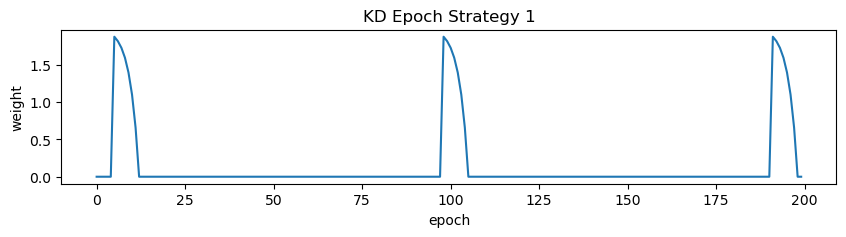

In [31]:
arr = np.arange(0,3,0.4)
arr_exp = np.exp(arr)
arr_transformed =  - (arr_exp * 2 / max(arr_exp) - 2)
arr = np.concatenate((np.zeros(5), arr_transformed))
arr2 = np.zeros(80)
total_arr = kd_strategy_maker(arr, arr2, total_epoch=200, plot=True, strategy_num=1)

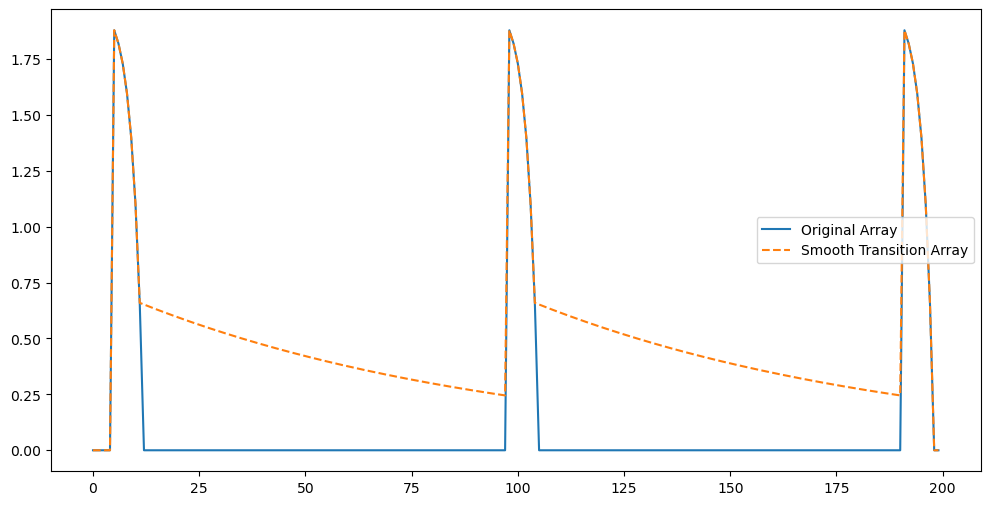

In [32]:
# Apply smooth transition function
smooth_total_arr = smooth_decay(total_arr)

# Plotting to visualize the result
plt.figure(figsize=(12, 6))
plt.plot(total_arr, label='Original Array')
plt.plot(smooth_total_arr, label='Smooth Transition Array', linestyle='--')
plt.legend()
plt.show()

In [33]:
cnt = 0
for i in range(200):
    if total_arr[i] != 0:
        cnt += 1
    print('epoch:', i, 'weight:', total_arr[i], 'kd:', False if total_arr[i] == 0  else True)

print('kd epoch:', cnt, 'normal epoch:', 200-cnt)

epoch: 0 weight: 0.0 kd: False
epoch: 1 weight: 0.0 kd: False
epoch: 2 weight: 0.0 kd: False
epoch: 3 weight: 0.0 kd: False
epoch: 4 weight: 0.0 kd: False
epoch: 5 weight: 1.8783798747495641 kd: True
epoch: 6 weight: 1.818564093421175 kd: True
epoch: 7 weight: 1.7293294335267746 kd: True
epoch: 8 weight: 1.5962069640106893 kd: True
epoch: 9 weight: 1.397611576175596 kd: True
epoch: 10 weight: 1.101342071765557 kd: True
epoch: 11 weight: 0.6593599079287213 kd: True
epoch: 12 weight: -0.0 kd: False
epoch: 13 weight: 0.0 kd: False
epoch: 14 weight: 0.0 kd: False
epoch: 15 weight: 0.0 kd: False
epoch: 16 weight: 0.0 kd: False
epoch: 17 weight: 0.0 kd: False
epoch: 18 weight: 0.0 kd: False
epoch: 19 weight: 0.0 kd: False
epoch: 20 weight: 0.0 kd: False
epoch: 21 weight: 0.0 kd: False
epoch: 22 weight: 0.0 kd: False
epoch: 23 weight: 0.0 kd: False
epoch: 24 weight: 0.0 kd: False
epoch: 25 weight: 0.0 kd: False
epoch: 26 weight: 0.0 kd: False
epoch: 27 weight: 0.0 kd: False
epoch: 28 weight: 

# Custom 2

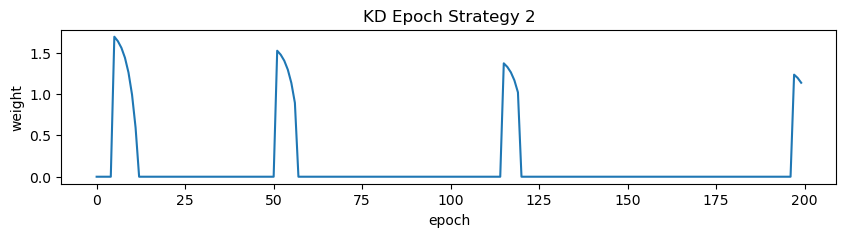

kd epoch: 21 normal epoch: 179


In [34]:
arr = np.arange(0,3,0.4)
arr_exp = np.exp(arr)
arr_transformed =  - (arr_exp * 2 / max(arr_exp) - 2)
arr = np.concatenate((np.zeros(5), arr_transformed))
arr2 = np.zeros(15)

total_arr = kd_strategy_maker2(arr, arr2, total_epoch=200,arr_decrease_weight = 0.9, arr_decrease_length = 1 , arr2_increase_length = 19, plot=True, strategy_num=2)

cnt = 0
for i in range(200):
    if total_arr[i] != 0:
        cnt += 1
    # print('epoch:', i, 'weight:', total_arr[i], 'kd:', False if total_arr[i] == 0  else True)

print('kd epoch:', cnt, 'normal epoch:', 200-cnt)

# Custom 3

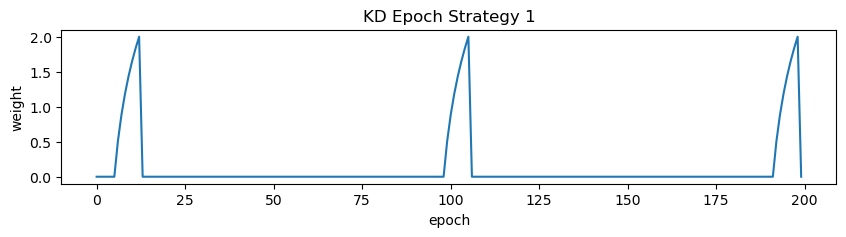

In [35]:
arr = np.arange(0,3,0.4)
arr = np.concatenate((np.zeros(5), 1.5*np.log(arr + 1)))
arr2 = np.zeros(80)
total_arr = kd_strategy_maker(arr, arr2, total_epoch=200, plot=True, strategy_num=1)

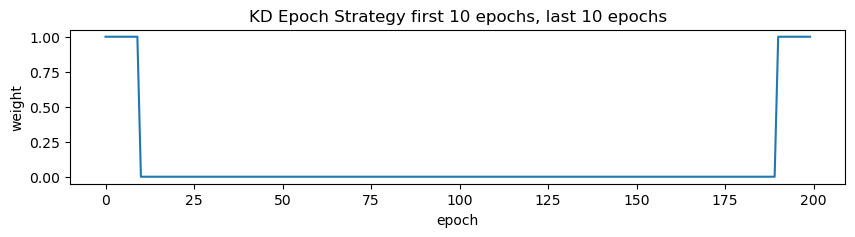

In [36]:
total_arr =([1]*10 + [0]*180 + [1]*10)

strategy_num = 'first 10 epochs, last 10 epochs'
plt.figure(figsize=(10, 2))
plt.title(f'KD Epoch Strategy {strategy_num}')
plt.plot(total_arr)
plt.xlabel('epoch')
plt.ylabel('weight')
plt.show()


# custom4

In [37]:
strategy_num = 'custom4'
total_arr = kd_strategy_maker(arr, arr2, total_epoch=200, plot=True, strategy_num=1)


plt.figure(figsize=(10,2))
plt.title(f'KD Epoch Strategy {strategy_num}')
plt.plot(total_arr)
plt.xlabel('epoch')
plt.ylabel('weight')
plt.show()
cnt = 0
for i in range(200):
    if total_arr[i] != 0:
        cnt += 1

SyntaxError: invalid syntax (496422503.py, line 2)

# Custom5

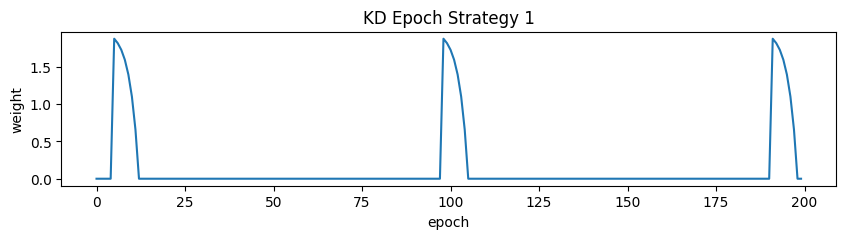

In [ ]:
arr = np.arange(0,3,0.4)
arr_exp = np.exp(arr)
arr_transformed =  - (arr_exp * 2 / max(arr_exp) - 2)
arr = np.concatenate((np.zeros(5), arr_transformed))
arr2 = np.zeros(80)
total_arr = kd_strategy_maker(arr, arr2, total_epoch=200, plot=True, strategy_num=1)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
def kd_strategy_maker(repeat_arr, repeat_period, repeat_delay=0, repeat_period_change=0, repeat_weight_change=1., threshold=0, plot=True, strategy_num=None, total_epoch=200, ):
    """Codes for kd strategy
    Args:
        repeat_arr : 복습의 형태를 정의하는 array
        repeat_period : 복습 간 주기
        repeat_delay : 첫 에폭에 시작하지 않고 약간 delay한 복습
        repeat_period_change : 복습 간 주기의 변화량 (덧셈)
        total_epoch : 총 학습 에폭
        repeat_weight_change : 복습 정도의 증감폭 (곱셈)
        threshold : 너무 작은 kd weight는 0으로 줄이는 것, 효율성 증가
    """
    total_arr = np.array([0.] * total_epoch)

    no_weight, give_weight = 0, len(repeat_arr)

    for e in range(total_epoch):
        if e < repeat_delay:
            continue

        if no_weight:  # (N, 0)
            total_arr[e] = 0
            no_weight += -1
            if no_weight == 0:  # (1, 0) -> (0, 0)
                give_weight = len(repeat_arr)
                repeat_period += repeat_period_change

        elif give_weight:  # (0, N)
            total_arr[e] = repeat_arr[-give_weight]
            give_weight += -1
            if give_weight == 0:  # (0, 1) -> (0, 0)
                repeat_arr *= repeat_weight_change
                no_weight = repeat_period

    # Plotting
    if plot:
        plt.figure(figsize=(10, 2))
        if strategy_num is None:
            plt.title('KD Epoch Strategy')
        else:
            plt.title(f'KD Epoch Strategy {strategy_num}')
        plt.plot(total_arr)
        plt.xlabel('epoch')
        plt.ylabel('weight')
        plt.show()

    return total_arr


In [42]:
def smooth_decay(total_arr):
    smooth_arr = total_arr.copy()  # 원본 배열 복사
    
    # 0이 아닌 값을 가지는 인덱스 찾기
    nonzero_indices = np.where(total_arr != 0)[0]
    
    for i in range(len(nonzero_indices) - 1):
        start_idx = nonzero_indices[i]
        end_idx = nonzero_indices[i + 1]
        
        # 시작 값과 끝 값
        start_val = total_arr[start_idx]
        end_val = total_arr[end_idx]
        
        # 지수 감소 함수 생성
        decay_range = np.arange(start_idx, end_idx)
        decay_func = start_val * np.exp(-(decay_range - start_idx) / (end_idx - start_idx))
        
        # 해당 구간에 지수 감소 함수 적용
        smooth_arr[start_idx:end_idx] = decay_func
    
    # 마지막 0이 아닌 값 이후의 값들에 대해 지수 감소 함수 적용
    if len(nonzero_indices) > 0:
        last_idx = nonzero_indices[-1]
        start_val = total_arr[last_idx]
        decay_range = np.arange(last_idx, len(total_arr))
        decay_func = start_val * np.exp(-(decay_range - last_idx) / len(total_arr))
        smooth_arr[last_idx:] = decay_func
    
    return smooth_arr

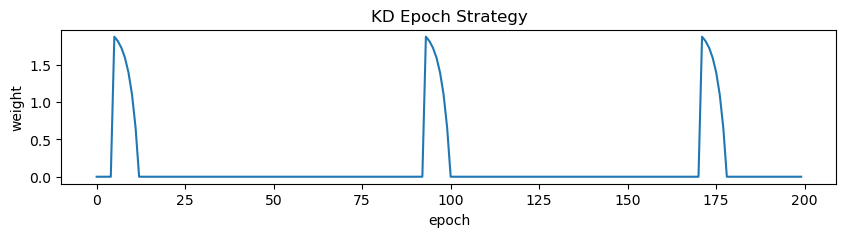

In [43]:
# strategy 0
arr = np.arange(0, 3, 0.4)
arr = np.exp(arr)
arr =  - (arr * 2 / max(arr) - 2)
total_arr = kd_strategy_maker(arr, repeat_period=80, repeat_delay=5, repeat_period_change=-10, repeat_weight_change=1.)

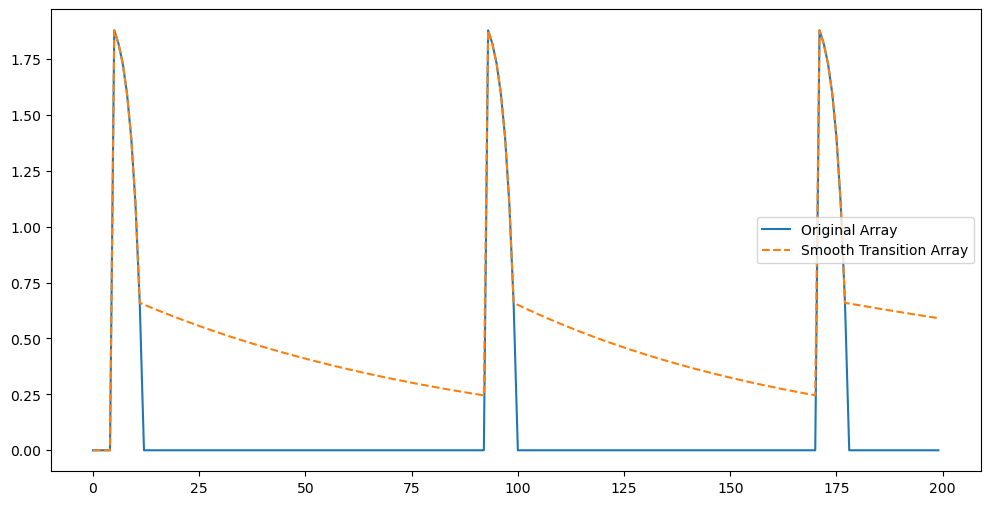

In [46]:
# Apply smooth transition function
smooth_total_arr = smooth_decay(total_arr)

# Plotting to visualize the result
plt.figure(figsize=(12, 6))
plt.plot(total_arr, label='Original Array')
plt.plot(smooth_total_arr, label='Smooth Transition Array', linestyle='--')
plt.legend()
plt.show()

In [39]:
# strategy 1
arr = np.arange(0,3, 0.4)
arr = np.concatenate((np.zeros(5), 1.5*np.log(arr + 1)))
total_arr = kd_strategy_maker(arr, repeat_period=80, repeat_delay=5, repeat_period_change=-10, repeat_weight_change=1.)

TypeError: kd_strategy_maker() got an unexpected keyword argument 'repeat_period'

/var/folders/l9/rb7j48z54n96mr23h_b6tdgc0000gn/T/ipykernel_47392/925093109.py:5: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  nonzero_indices = np.where(total_arr != 0)[0]


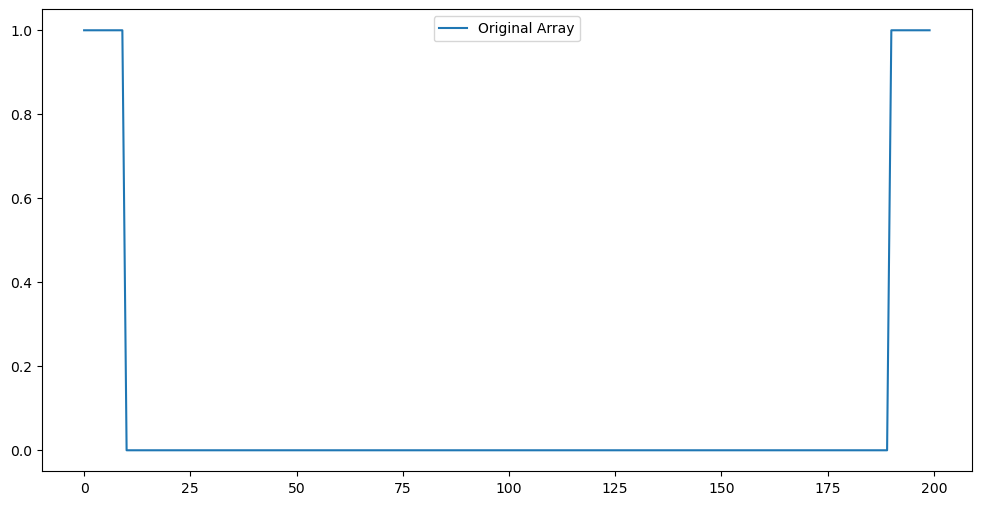

In [38]:
# Apply smooth transition function
smooth_total_arr = smooth_decay(total_arr)

# Plotting to visualize the result
plt.figure(figsize=(12, 6))
plt.plot(total_arr, label='Original Array')
# plt.plot(smooth_total_arr, label='Smooth Transition Array', linestyle='--')
plt.legend()
plt.show()